In [1]:
using Pkg
Pkg.activate("..")
Pkg.instantiate()
Pkg.update()
# Pkg.upgrade_manifest()

  Activating project at `~/CropModeling/Garcumber`


    Updating registry at `~/.julia/registries/General.toml`


  No Changes to `~/CropModeling/Garcumber/Project.toml`
  No Changes to `~/CropModeling/Garcumber/Manifest.toml`


In [2]:
# using Cropbox
using Test
# using Plots
using TimeZones
using DataFramesMeta
using CSV
# Cropbox.Interact.WebIO.setup(:ijulia)

In [3]:
include("../src/Garlic.jl")

import Dates

obs_veget = CSV.read("$(@__DIR__)/../data/Phenology_Vegetative_2nd.csv", DataFrame);
obs_repro = CSV.read("$(@__DIR__)/../data/Phenology_Reproductive_2nd.csv", DataFrame);

In [4]:
# Cropbox.hierarchy(Garlic.Context)

In [5]:
tz = tz"Asia/Seoul"

Cucumber = @config (
    :Phenology => (
        optimal_temperature = 25, # Topt
        ceiling_temperature = 30, # Tceil
        critical_photoperiod = 12, # critPPD
        # initial_leaves_at_harvest = 5, # ILN
        maximum_leaf_initiation_rate = 1.70878, # LIR
        maximum_emergence_rate = 0.2,
        # maximum_leaf_initiation_rate = 0.1003, # LIR
        maximum_phyllochron_asymptote = 1.75561, # LTARa
        leaves_generic = 50, # GLN
    ),
    :Leaf => (
        maximum_elongation_rate = 4.70, # LER
        minimum_length_of_longest_leaf = 25.0, # LL
        # stay_green = 1.84, # SG
        stay_green = 20,
        length_to_width_ratio = 1,
        leaf_detaching_rate = 23, #LDR
    ),
    :Carbon => (
        maintenance_respiration_coefficient = 0.012, # Rm
        synthesis_efficiency = 0.8, # Yg
    ),
    :Meta => (; cultivar = :Cucumber),
    :Plant => (initial_planting_density = 55,),
);

In [6]:
Calibrate = @config(Cucumber, (
    :Phenology => (
        planting_date = ZonedDateTime(2020, 10, 22, tz"Asia/Seoul"),
        emergence_date = ZonedDateTime(2020, 10, 23, tz"Asia/Seoul"),
        first_flowering_date = ZonedDateTime(2020, 11, 19, tz"Asia/Seoul"),
    ),
    :Meta => (
        planting_group = 1,
        year = 2020,
    ),
    :Calendar => (
        init = ZonedDateTime(2020, 10, 22, tz"Asia/Seoul"),
        last = ZonedDateTime(2021, 2, 15, tz"Asia/Seoul"),
    ),
    :Weather => (
        CO2 = 500, # CO2 Enrichment
        store = Garlic.loadwea("$(@__DIR__)/../data/Cucumber1st.wea", tz"Asia/Seoul"),
    ),
));


In [7]:
Validate = @config(Cucumber, (
    :Phenology => (
        planting_date = ZonedDateTime(2021, 2, 1, tz"Asia/Seoul"), # Y1 sow
        emergence_date = ZonedDateTime(2021, 2, 23, tz"Asia/Seoul"), # Y1 emg
        first_flowering_date = ZonedDateTime(2021, 3, 24, tz"Asia/Seoul"),
    ),
    :Meta => (
        planting_group = 2,
        year = 2021,
    ),
    :Calendar => (
        init = ZonedDateTime(2021, 2, 1, tz"Asia/Seoul"),
        last = ZonedDateTime(2021, 8, 29, tz"Asia/Seoul"),
    ),
    :Weather => (
        CO2 = 500, # CO2 Enrichment
        store = Garlic.loadwea("$(@__DIR__)/../data/Cucumber2nd.wea", tz"Asia/Seoul"),
    ),
));

In [8]:
# obs_veget_unit = obs_veget |> unitfy
# obs_repro_unit = obs_repro |> unitfy

# f(s) = s.DAP' in obs_repro_unit.DAP && Dates.hour(s.calendar.time') == 12

# calibrate(Garlic.Model, obs_repro_unit;
#     config=Cucumber,
#     stop="calendar.count",
#     index=:DAP,
#     target=:flowers_appeared => :flowers_appeared,
#     parameters= :Phenology => (;
#         FAR_max = (0.4, 1.8),
#         FIR_max = (0.4, 1.8),
#     ),
#     snap=f,
#     optim=(:MaxSteps => 20,),
# )

In [9]:
# obs_veget_unit = obs_veget |> unitfy
# obs_repro_unit = obs_repro |> unitfy

# f(s) = s.DAP' in obs_repro_unit.DAP && Dates.hour(s.calendar.time') == 12

# calibrate(Garlic.Model, obs_repro_unit;
#     config=Cucumber,
#     stop="calendar.count",
#     index=:DAP,
#     target=:fruits_appeared => :fruits_appeared,
#     parameters= :Phenology => (;
#         FRIR_max = (0.4, 1.8),
#         FRAR_max = (0.4, 1.8),
#     ),
#     snap=f,
#     optim=(:MaxSteps => 20,),
# )

In [10]:
# obs_veget_unit = obs_veget |> unitfy
# obs_repro_unit = obs_repro |> unitfy

# f(s) = s.DAP' in obs_veget_unit.DAP && Dates.hour(s.calendar.time') == 12

# calibrate(Garlic.Model, obs_veget_unit;
#     config=Cucumber,
#     stop="calendar.count",
#     index=:DAP,
#     target=:internode_count => :leaves_appeared,
#     parameters= :Phenology => (;
#         LTARa_max = (0.4, 1.8),
#         LIR_max = (0.4, 1.8),
#     ),
#     snap=f,
#     optim=(:MaxSteps => 50,),
# )

Progress:   1%[>                          ]  ETA: 0:16:49 ( 0.20  s/it)

Progress:   3%[>                          ]  ETA: 0:06:00 (73.63 ms/it)

Progress:  19%[=====>                     ]  ETA: 0:00:46 (11.23 ms/it)

Progress:  34%[=========>                 ]  ETA: 0:00:23 ( 6.91 ms/it)

Progress:  47%[============>              ]  ETA: 0:00:15 ( 5.46 ms/it)

Progress:  58%[===============>           ]  ETA: 0:00:10 ( 4.75 ms/it)

Progress:  69%[==================>        ]  ETA: 0:00:07 ( 4.35 ms/it)

Progress:  78%[=====================>     ]  ETA: 0:00:04 ( 4.10 ms/it)

Progress:  87%[=======================>   ]  ETA: 0:00:03 ( 3.93 ms/it)

Progress:  95%[=========================> ]  ETA: 0:00:01 ( 3.81 ms/it)

Progress: 100%[===========================] Time: 0:00:18 ( 3.76 ms/it)


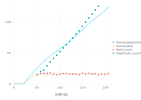

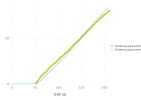

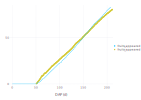

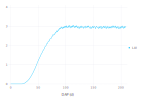

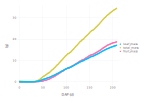

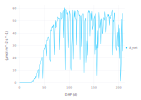

In [11]:
obs_veget_unit = obs_veget |> unitfy
obs_repro_unit = obs_repro |> unitfy

r = simulate(Garlic.Model;
    config=Validate,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
)
# @test r.leaves_initiated[end] > 0

plot_veg = visualize(r, :DAP, [:leaves_appeared, :leaves_real], kind=:line)
visualize!(plot_veg, obs_veget_unit, :DAP, [:leaf_count, :internode_count]) |> display # Fig. 3.D
plot_rep = visualize(r, :DAP, [:flowers_appeared], kind=:line)
visualize!(plot_rep, obs_repro_unit, :DAP, [:flowers_appeared]) |> display
plot_rep_f = visualize(r, :DAP, [:fruits_appeared], kind=:line)
visualize!(plot_rep_f, obs_repro_unit, :DAP, [:fruits_appeared]) |> display
visualize(r, :DAP, :LAI, kind=:line) |> display # Fig. 4.D
visualize(r, :DAP, [:leaf_mass, :total_mass, :fruit_mass]) |> display
visualize(r, :DAP, [:A_net], kind=:line) |> display
# p = visualize(r, :DAP, [:leaves_real], kind=:line)

In [12]:
evaluate(Garlic.Model, obs_veget_unit; 
    config = Validate,
    index = :DAP => :DAP,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
    target = :leaf_count => :leaves_real, metric = :ef)

-0.5825379623547571

In [13]:
evaluate(Garlic.Model, obs_repro_unit; 
    config = Validate,
    index = :DAP => :DAP,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
    target = :flowers_appeared => :flowers_appeared, metric = :ef)


0.9827863650109431

In [14]:
evaluate(Garlic.Model, obs_repro_unit; 
    config = Validate,
    index = :DAP => :DAP,
    stop="calendar.count",
    snap=s -> Dates.hour(s.calendar.time') == 12,
    target = :fruits_appeared => :fruits_appeared, metric = :ef)


0.9825041623820099

In [15]:
# manipulate(Garlic.Model, :DAP, [:leaves_appeared, :leaves_mature, :leaves_dropped, :leaves_detached, :leaves_real];
#     config = Cucumber,
#     parameters = :Phenology => (;
#         optimal_temperature = 10:40,
        
#     ),
#     stop = "calendar.count",
#     kind = :line,
# )